Sample rate: 48000 Hz
Audio duration: 145.75 seconds
Number of channels: 1
Max amplitude: 0.352539
Min amplitude: 0.000000
Mean amplitude: 0.012825

RMS Energy Statistics:
Mean RMS: 0.016921
Median RMS: 0.005644
Standard Deviation RMS: 0.020642
10th percentile RMS: 0.000288
25th percentile RMS: 0.000602


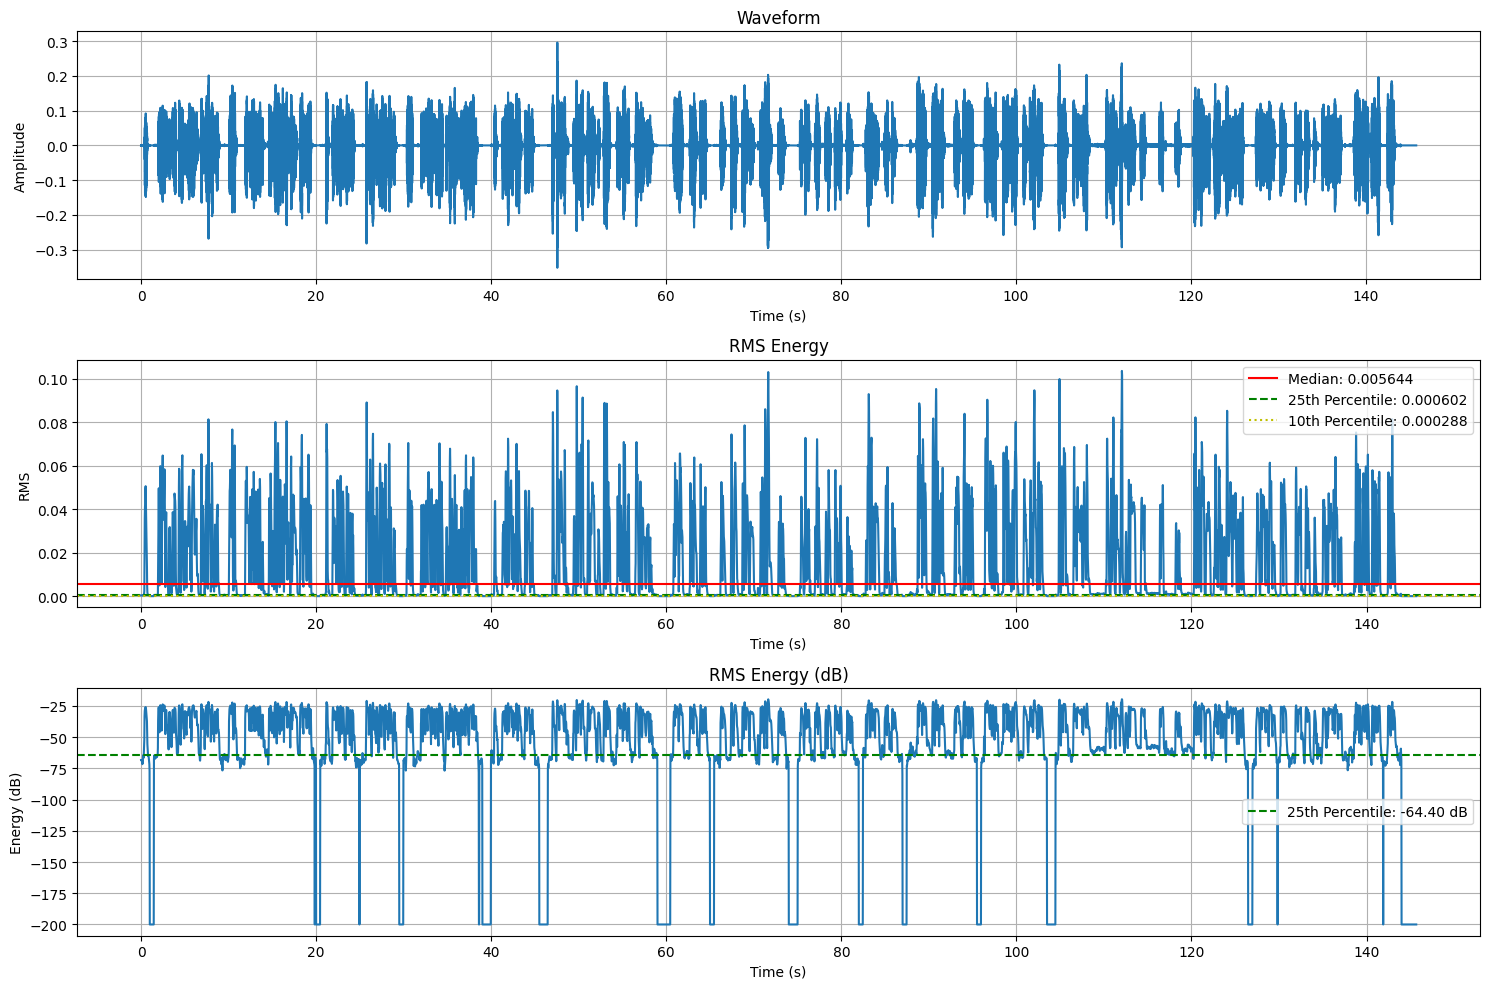


Silence segments using 25th percentile threshold:
Segment 1: 0.00s - 0.33s (duration: 0.33s)
Segment 2: 0.80s - 1.68s (duration: 0.88s)
Segment 3: 9.00s - 9.47s (duration: 0.47s)
Segment 4: 9.57s - 10.03s (duration: 0.45s)
Segment 5: 10.97s - 11.90s (duration: 0.93s)
Segment 6: 19.73s - 20.93s (duration: 1.20s)
Segment 7: 21.55s - 21.88s (duration: 0.32s)
Segment 8: 24.48s - 25.30s (duration: 0.82s)
Segment 9: 25.35s - 25.70s (duration: 0.35s)
Segment 10: 29.23s - 30.32s (duration: 1.10s)
Segment 11: 31.15s - 31.55s (duration: 0.40s)
Segment 12: 38.50s - 40.02s (duration: 1.52s)
Segment 13: 40.80s - 41.12s (duration: 0.33s)
Segment 14: 45.00s - 46.95s (duration: 1.95s)
Segment 15: 52.55s - 52.85s (duration: 0.30s)
Segment 16: 53.88s - 54.30s (duration: 0.42s)
Segment 17: 58.90s - 60.50s (duration: 1.60s)
Segment 18: 64.83s - 65.80s (duration: 0.97s)
Segment 19: 65.83s - 66.20s (duration: 0.38s)
Segment 20: 66.85s - 67.38s (duration: 0.53s)
Segment 21: 72.15s - 72.78s (duration: 0.62s)

/Users/masaishi/ghq/github.com/masaishi/claion-exp/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


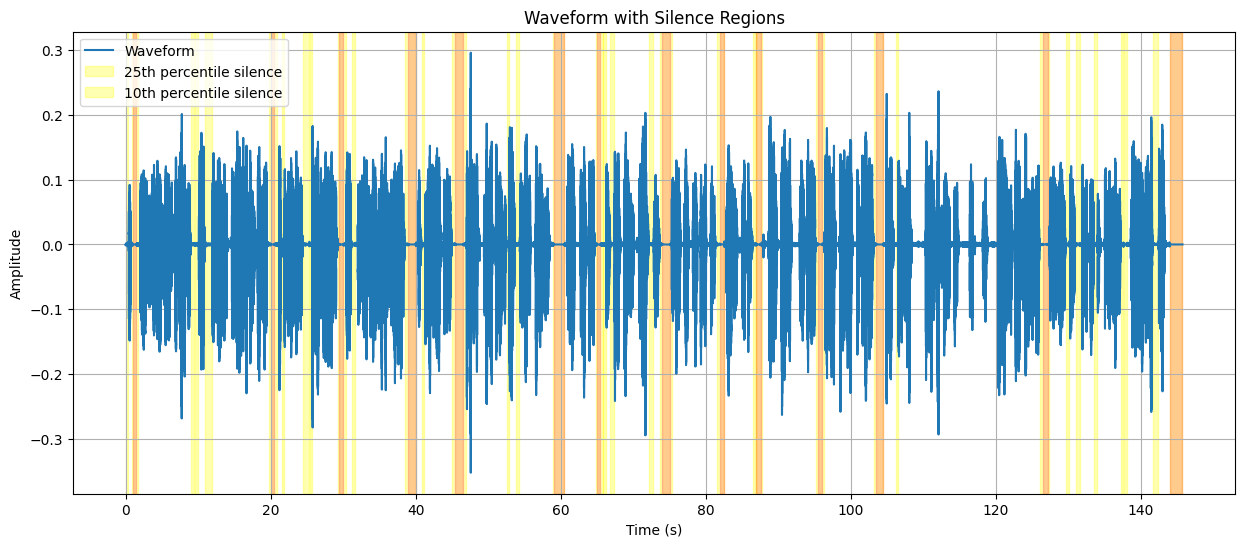


Splitting audio at silence points (25th percentile threshold):
Segment 1: 0.00s - 0.33s (duration: 0.33s)
Segment 2: 0.33s - 1.68s (duration: 1.35s)
Segment 3: 1.68s - 9.47s (duration: 7.80s)
Segment 4: 9.47s - 10.03s (duration: 0.55s)
Segment 5: 10.03s - 11.90s (duration: 1.88s)
Segment 6: 11.90s - 20.93s (duration: 9.03s)
Segment 7: 20.93s - 21.88s (duration: 0.95s)
Segment 8: 21.88s - 25.30s (duration: 3.42s)
Segment 9: 25.30s - 25.70s (duration: 0.40s)
Segment 10: 25.70s - 30.32s (duration: 4.62s)
Segment 11: 30.32s - 31.55s (duration: 1.23s)
Segment 12: 31.55s - 40.02s (duration: 8.47s)
Segment 13: 40.02s - 41.12s (duration: 1.10s)
Segment 14: 41.12s - 46.95s (duration: 5.83s)
Segment 15: 46.95s - 52.85s (duration: 5.90s)
Segment 16: 52.85s - 54.30s (duration: 1.45s)
Segment 17: 54.30s - 60.50s (duration: 6.20s)
Segment 18: 60.50s - 65.80s (duration: 5.30s)
Segment 19: 65.80s - 66.20s (duration: 0.40s)
Segment 20: 66.20s - 67.38s (duration: 1.18s)
Segment 21: 67.38s - 72.78s (dur

In [ ]:
import torchaudio
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
from torchaudio.transforms import AmplitudeToDB

# Load the audio file
audio_file = "../data/inputs/original-demo-speech.wav"
waveform, sample_rate = torchaudio.load(audio_file)

# Print basic audio information
print(f"Sample rate: {sample_rate} Hz")
print(f"Audio duration: {waveform.shape[1] / sample_rate:.2f} seconds")
print(f"Number of channels: {waveform.shape[0]}")
print(f"Max amplitude: {waveform.abs().max().item():.6f}")
print(f"Min amplitude: {waveform.abs().min().item():.6f}")
print(f"Mean amplitude: {waveform.abs().mean().item():.6f}")

# Calculate RMS (Root Mean Square) energy over time
window_size = int(0.05 * sample_rate)  # 50ms window
hop_length = int(0.025 * sample_rate)  # 25ms hop
rms_values = []
time_values = []

for i in range(0, waveform.shape[1] - window_size, hop_length):
    chunk = waveform[:, i:i+window_size]
    rms = torch.sqrt(torch.mean(chunk**2)).item()
    rms_values.append(rms)
    time_values.append(i / sample_rate)

# Convert to dB for better visualization
rms_db = 20 * np.log10(np.array(rms_values) + 1e-10)  # Add small value to avoid log(0)

# Calculate statistics on the RMS energy
rms_mean = np.mean(rms_values)
rms_median = np.median(rms_values)
rms_std = np.std(rms_values)
rms_percentile_10 = np.percentile(rms_values, 10)
rms_percentile_25 = np.percentile(rms_values, 25)

print(f"\nRMS Energy Statistics:")
print(f"Mean RMS: {rms_mean:.6f}")
print(f"Median RMS: {rms_median:.6f}")
print(f"Standard Deviation RMS: {rms_std:.6f}")
print(f"10th percentile RMS: {rms_percentile_10:.6f}")
print(f"25th percentile RMS: {rms_percentile_25:.6f}")

# Plot the waveform and RMS energy
plt.figure(figsize=(15, 10))

# Original waveform
plt.subplot(3, 1, 1)
plt.plot(np.linspace(0, waveform.shape[1] / sample_rate, waveform.shape[1]), waveform[0].numpy())
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# RMS energy
plt.subplot(3, 1, 2)
plt.plot(time_values, rms_values)
plt.axhline(y=rms_median, color='r', linestyle='-', label=f'Median: {rms_median:.6f}')
plt.axhline(y=rms_percentile_25, color='g', linestyle='--', label=f'25th Percentile: {rms_percentile_25:.6f}')
plt.axhline(y=rms_percentile_10, color='y', linestyle=':', label=f'10th Percentile: {rms_percentile_10:.6f}')
plt.title('RMS Energy')
plt.xlabel('Time (s)')
plt.ylabel('RMS')
plt.legend()
plt.grid(True)

# RMS energy in dB
plt.subplot(3, 1, 3)
plt.plot(time_values, rms_db)
threshold_db = 20 * np.log10(rms_percentile_25 + 1e-10)  # Convert to dB
plt.axhline(y=threshold_db, color='g', linestyle='--', label=f'25th Percentile: {threshold_db:.2f} dB')
plt.title('RMS Energy (dB)')
plt.xlabel('Time (s)')
plt.ylabel('Energy (dB)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Define a function to identify silence segments
def find_silence_segments(rms_values, time_values, threshold=None, min_silence_duration=0.3):
    if threshold is None:
        threshold = rms_percentile_25  # Use 25th percentile as default
    
    silence_segments = []
    in_silence = False
    ss = 0  # ss = start time
    
    for i, rms in enumerate(rms_values):
        if rms < threshold and not in_silence:
            # Start of silence
            in_silence = True
            ss = time_values[i]
        elif rms >= threshold and in_silence:
            # End of silence
            es = time_values[i]  # es = end time
            silence_duration = es - ss
            if silence_duration >= min_silence_duration:
                silence_segments.append((ss, es, silence_duration))
            in_silence = False
    
    # Check if we ended in a silence
    if in_silence and (time_values[-1] - ss) >= min_silence_duration:
        es = time_values[-1]  # es = end time
        silence_segments.append((ss, es, es - ss))
    
    return silence_segments

# Find silence segments using different thresholds
silence_segments_25 = find_silence_segments(rms_values, time_values, rms_percentile_25)
silence_segments_10 = find_silence_segments(rms_values, time_values, rms_percentile_10)

print("\nSilence segments using 25th percentile threshold:")
for i, (ss, es, duration) in enumerate(silence_segments_25):
    print(f"Segment {i+1}: ss={ss:.2f}s, es={es:.2f}s (duration: {duration:.2f}s)")

print("\nSilence segments using 10th percentile threshold:")
for i, (ss, es, duration) in enumerate(silence_segments_10):
    print(f"Segment {i+1}: ss={ss:.2f}s, es={es:.2f}s (duration: {duration:.2f}s)")

# Plot waveform with identified silence regions
plt.figure(figsize=(15, 6))
plt.plot(np.linspace(0, waveform.shape[1] / sample_rate, waveform.shape[1]), waveform[0].numpy())

# Highlight silence regions with 25th percentile threshold
for ss, es, _ in silence_segments_25:
    plt.axvspan(ss, es, color='yellow', alpha=0.3)

# Highlight silence regions with 10th percentile threshold
for ss, es, _ in silence_segments_10:
    plt.axvspan(ss, es, color='red', alpha=0.2)

plt.title('Waveform with Silence Regions')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['Waveform', '25th percentile silence', '10th percentile silence'])
plt.grid(True)
plt.show()

# Modified split function to split at silence points
def split_at_silence(waveform, sample_rate, silence_segments, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    
    # Add 0 as the start point and the end of audio as the end point
    split_points = [0]
    for _, es, _ in silence_segments:
        split_points.append(int(es * sample_rate))
    if split_points[-1] < waveform.shape[1]:
        split_points.append(waveform.shape[1])
    
    # Ensure split points are unique and sorted
    split_points = sorted(set(split_points))
    
    # Split the audio at these points
    for i in range(len(split_points) - 1):
        ss_sample = split_points[i]
        es_sample = split_points[i+1]
        
        # Extract segment
        segment = waveform[:, ss_sample:es_sample]
        
        # Save segment
        segment_filename = os.path.join(output_dir, f"segment_{i+1}.wav")
        torchaudio.save(segment_filename, segment, sample_rate)
        
        segment_duration = segment.shape[1] / sample_rate
        print(f"Segment {i+1}: ss={ss_sample/sample_rate:.2f}s, es={es_sample/sample_rate:.2f}s (duration: {segment_duration:.2f}s)")
    
    return len(split_points) - 1

# Split the audio using 25th percentile silence detection
output_dir = "../data/outputs/split_audio_silence"
print("\nSplitting audio at silence points (25th percentile threshold):")
num_segments = split_at_silence(waveform, sample_rate, silence_segments_25, output_dir)
print(f"Created {num_segments} segments in {output_dir}")

# Alternative: Use 10th percentile for stricter silence detection
output_dir_strict = "../data/outputs/split_audio_silence_strict"
print("\nSplitting audio at silence points (10th percentile threshold):")
num_segments_strict = split_at_silence(waveform, sample_rate, silence_segments_10, output_dir_strict)
print(f"Created {num_segments_strict} segments in {output_dir_strict}")

In [4]:
waveform.shape, sample_rate

(torch.Size([1, 6996000]), 48000)